# Evaluate AWS Comprehend Results

After Training a classifier, AWS Comprehend shows the main evalution metrics and returns the [confusion matrix](https://docs.aws.amazon.com/comprehend/latest/dg/conf-matrix.html).
Based on the confusion matrix, we validate the Comprehend metrics and calculate additional ones.

## Prerequisites

In [1]:
import pandas as pd
from pathlib import Path
import json

## Import Data

In [2]:
data_dir = Path("data/")

In [3]:
with open(data_dir / "aws_comprehend_confusion_matrix.json") as f:
    data = json.load(f)
    # print(json.dumps(data, indent=4))
    
cm_df = pd.DataFrame(data["confusion_matrix"], columns=data["labels"], index=data["all_labels"])
display(cm_df)

,Etat,Inland,International,Kultur,Panorama,Sport,Web,Wirtschaft,Wissenschaft
Etat,59,1,1,1,2,0,3,0,0
Inland,2,85,2,3,3,0,1,6,0
International,2,2,129,0,11,1,1,4,1
Kultur,1,0,1,45,3,0,0,1,3
Panorama,2,7,11,6,124,0,1,11,6
Sport,0,0,0,0,1,118,0,1,0
Web,2,1,0,1,0,0,162,0,2
Wirtschaft,2,7,4,0,4,0,3,120,1
Wissenschaft,0,3,2,0,1,0,0,1,50


## Convert Confusion Matrix into Predictions

In [4]:
pred_df = (cm_df
           .melt(ignore_index=False).reset_index()
           .rename(columns = {'index':'actual', 'variable':'predicted'})
           .loc[lambda x: x.index.repeat(x.value)].drop("value", axis=1)
          )
# pred_df

### Plot Confusion Matrix

In [5]:
test_labels = pred_df.actual
pred_labels = pred_df.predicted
labels = data["labels"]

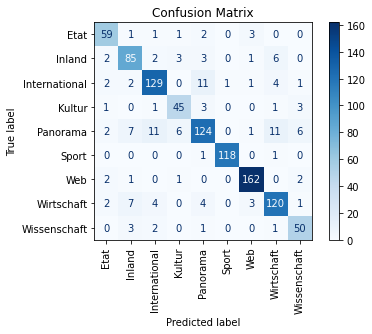

In [6]:
import sklearn.metrics as skm
import matplotlib.pyplot as plt

cm = skm.confusion_matrix(test_labels, pred_labels, labels=labels)
cmd = skm.ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix");

### Detailed Report

In [7]:
print(skm.classification_report(test_labels, pred_labels))

               precision    recall  f1-score   support

         Etat       0.84      0.88      0.86        67
       Inland       0.80      0.83      0.82       102
International       0.86      0.85      0.86       151
       Kultur       0.80      0.83      0.82        54
     Panorama       0.83      0.74      0.78       168
        Sport       0.99      0.98      0.99       120
          Web       0.95      0.96      0.96       168
   Wirtschaft       0.83      0.85      0.84       141
 Wissenschaft       0.79      0.88      0.83        57

     accuracy                           0.87      1028
    macro avg       0.86      0.87      0.86      1028
 weighted avg       0.87      0.87      0.87      1028



In [8]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, hamming_loss, matthews_corrcoef

print(f"{accuracy_score(test_labels, pred_labels):.4} accuracy")
print(f"{precision_score(test_labels, pred_labels, average='macro'):.4} precision (macro)")
print(f"{recall_score(test_labels, pred_labels, average='macro'):.4} recall (macro)")
print(f"{f1_score(test_labels, pred_labels, average='macro'):.4} f1 (marco)")
print(f"{f1_score(test_labels, pred_labels, average='weighted'):.4} f1 (weighted)")
print(f"{matthews_corrcoef(test_labels, pred_labels):.4} mcc")
print(f"{hamming_loss(test_labels, pred_labels):.4} hamming loss")

0.8677 accuracy
0.8563 precision (macro)
0.8684 recall (macro)
0.8617 f1 (marco)
0.8671 f1 (weighted)
0.8488 mcc
0.1323 hamming loss
